<a href="https://colab.research.google.com/github/gabriellearruda/analises-singlecell-alzheimer/blob/main/Case_IC_Seaurat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio para vaga de estágio de Análise Multiômica de Células Únicas no Tecido Cerebral Humano

Abaixo segue script de desafio para vaga de estágio de neurociências em análise multiômica de células únicas na UNIFESP. O desafio consiste em um script do Seurat para rodar com uma base de dados de células do sangue, que é uma base mais simples de trabalhar, e depois apresentar o passo a passo.

O Seurat é um pacote do R que tem como função realizar análise de qualidade e de expressão gênica diferencial de dados provenientes de sequenciamento de células únicas.

Links de interesse:
*   [Artigo da Nature sobre Seurat](https://www.nature.com/articles/nbt.4096)
*   [Single-cell basics](https://genomemedicine.biomedcentral.com/articles/10.1186/s13073-017-0467-4)
*   [Artigo da Nature sobre Single Cells](https://www.nature.com/articles/s41576-019-0093-7)
*   [Tutorial do Seurat](https://satijalab.org/seurat/articles/pbmc3k_tutorial)
*   [Fonte do Dataset](https://cf.10xgenomics.com/samples/cell/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz)




## Resumo sobre estudo de células únicas ✅

A análise de célula única é uma técnica que permite aos pesquisadores estudar as células individuais em um tecido ou organismo. Isso é feito separando as células individuais e analisando suas propriedades, como genes, proteínas e moléculas.

Isso é diferente das técnicas anteriores, onde as células eram estudadas em grupos, e as diferenças entre as células individuais não eram tão claras. Com a análise de célula única, podemos ver como cada célula é única em sua expressão genética (os genes que estão ativos) e em suas características. Isso é importante porque as células dentro de um mesmo tecido ou órgão podem ser muito diferentes umas das outras, e entender essas diferenças é crucial para a pesquisa médica e biológica. Essa técnica nos ajuda a descobrir mais sobre como as células funcionam e como elas podem estar relacionadas a doenças ou tratamentos específicos.

A análise de célula única está sendo usada para investigar a depressão de várias maneiras. Os pesquisadores estão usando a análise de célula única para:

* Identificar novos biomarcadores de depressão. Os biomarcadores são sinais biológicos que podem ser usados para diagnosticar ou monitorar uma doença. A identificação de novos biomarcadores de depressão pode ajudar os pesquisadores a desenvolver novos testes de diagnóstico e tratamentos mais eficazes.
* Estudar as alterações celulares que ocorrem na depressão. A análise de célula única pode ajudar os pesquisadores a entender melhor as alterações celulares que ocorrem na depressão. Isso pode levar ao desenvolvimento de novos tratamentos que se concentrem na correção dessas alterações.
* Desenvolver novos medicamentos para depressão. A análise de célula única pode ajudar os pesquisadores a identificar novos alvos moleculares para medicamentos antidepressivos. Isso pode levar ao desenvolvimento de novos medicamentos que sejam mais eficazes e com menos efeitos colaterais do que os medicamentos atuais.

Alguns exemplos específicos de como a análise de célula única está sendo usada para investigar a depressão incluem:

* Um estudo de 2022 publicado na revista Nature Medicine identificou um novo biomarcador de depressão em células cerebrais. O biomarcador é uma proteína chamada BRD9, que é produzida em níveis mais altos em células cerebrais de pessoas com depressão.
* Um estudo de 2021 publicado na revista Nature Cell Biology descobriu que as células gliais, que são células do cérebro que apoiam as células nervosas, desempenham um papel importante na depressão. O estudo descobriu que as células gliais produzem uma proteína chamada IL-1b, que pode contribuir para os sintomas da depressão.
* Um estudo de 2020 publicado na revista Nature Neuroscience descobriu que os antidepressivos podem funcionar alterando a expressão de genes em células cerebrais. O estudo descobriu que os antidepressivos podem aumentar a expressão de genes que estão envolvidos na regulação do humor e diminuir a expressão de genes que estão envolvidos na inflamação.

## Preparando o ambiente ✅

Esta parte visa instalar os pacotes necessários para o script, bem como adicionar os dados a serem analisados.

In [ ]:
install.packages('tidyverse')
install.packages('ggplot2')
install.packages('patchwork')
install.packages('umap')
install.packages('MASS')
install.packages('Matrix')
remotes::install_version("Seurat", version = "4.3.0")

In [ ]:
library(dplyr)
library(Seurat)
library(patchwork)

Vamos analisar o um conjunto de dados de células mononucleares do sangue periférico (PBMC) disponíveis gratuitamente na 10X Genomics.

In [ ]:
# A Read10X() lê a saída do pipeline cellranger de 10X, retornando uma matriz de contagem de identificação molecular exclusiva (UMI).
# Os valores nesta matriz representam o número de moléculas para cada característica (ou seja, gene; linha)
# que são detectadas em cada célula (coluna).
pbmc.data <- Read10X(data.dir = "../content/dados")

# Initialize the Seurat object with the raw (non-normalized data).
# min.cells -> Inclui recursos detectados em pelo menos esse número de células.
# min.features -> Inclua células onde pelo menos esse número de recursos seja detectado.
pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)
pbmc

In [ ]:
# Lets examine a few genes in the first thirty cells
pbmc.data[c("CD3D", "TCL1A", "MS4A1"), 1:30]

  [[ suppressing 30 column names ‘AAACATACAACCAC-1’, ‘AAACATTGAGCTAC-1’, ‘AAACATTGATCAGC-1’ ... ]]



3 x 30 sparse Matrix of class "dgCMatrix"
                                                                   
CD3D  4 . 10 . . 1 2 3 1 . . 2 7 1 . . 1 3 . 2  3 . . . . . 3 4 1 5
TCL1A . .  . . . . . . 1 . . . . . . . . . . .  . 1 . . . . . . . .
MS4A1 . 6  . . . . . . 1 1 1 . . . . . . . . . 36 1 2 . . 2 . . . .

## Análises ✅

### QC metrics 🆗


São um conjunto de medidas estatísticas que são usadas para avaliar a qualidade de um conjunto de dados. Elas podem ser usadas para identificar problemas como contaminação, distribuição desigual dos dados e outliers.

As métricas de CQ são importantes para a análise de célula única porque ajudam a garantir que os dados sejam de alta qualidade e confiáveis. Elas podem ser usadas para identificar problemas como contaminação, distribuição desigual dos dados e outliers. A contaminação pode ocorrer quando células de outras fontes, como células mortas ou células de outros tecidos, são incluídas no conjunto de dados. A distribuição desigual dos dados pode ocorrer quando as células são distribuídas de forma desigual em cada experimento.

Seurat permite que você explore facilmente métricas de controle de qualidade e filtre células com base em qualquer critério definido pelo usuário. Algumas métricas de CQ comumente usadas pela comunidade incluem:

*   O número de genes únicos detectados em cada célula.
  *   Células de baixa qualidade ou gotículas vazias geralmente terão poucos genes
  *   Dupletos ou multipletos celulares podem exibir uma contagem genética aberrantemente alta
*   Da mesma forma, o número total de moléculas detectadas dentro de uma célula (correlaciona-se fortemente com genes únicos)
*   A porcentagem de leituras que mapeiam o genoma mitocondrial
  *   Células de baixa qualidade/que morrem frequentemente exibem extensa contaminação mitocondrial
  *   Calculamos métricas de CQ mitocondrial com a PercentageFeatureSet()função, que calcula a porcentagem de contagens originadas de um conjunto de características
  *   Usamos o conjunto de todos os genes começando MT-como um conjunto de genes mitocondriais

In [ ]:
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")

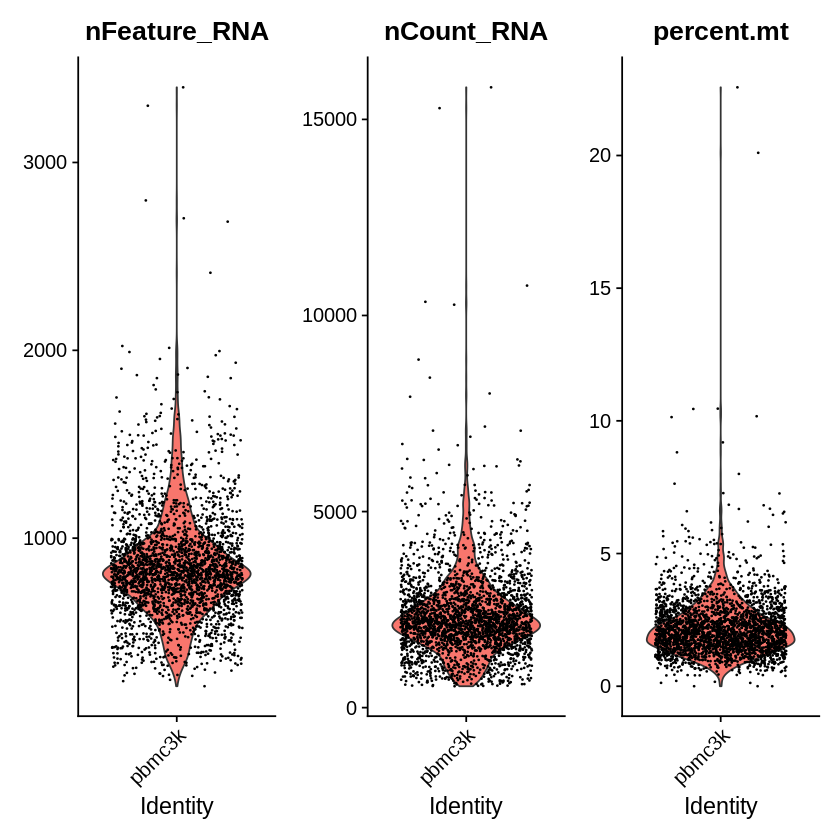

In [ ]:
VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [ ]:
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)

### Identification of highly variable features (feature selection of 5 mostly highly variable genes): generate the two label points plots 🆗

Esta análise identifica genes que apresentam um alto grau de variabilidade entre as células. Esses genes são frequentemente usados como marcadores para populações ou estados celulares.

A identificação de características altamente variáveis é importante para a análise de célula única porque ajuda a identificar genes que são importantes para a diferenciação ou função celular. Genes altamente variáveis são frequentemente usados como marcadores para populações ou estados celulares. Eles podem ser usados para identificar células de diferentes tipos ou estados, como células cancerosas e células normais.

Depois de remover células indesejadas do conjunto de dados, a próxima etapa é normalizar os dados. Por padrão, empregamos um método de normalização de escala global “LogNormalize” que normaliza as medidas de expressão de recurso para cada célula pela expressão total, multiplica isso por um fator de escala (10.000 por padrão) e transforma o resultado em log.

In [ ]:
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)

In [ ]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# Identifica os 5 genes mais altamente variáveis
top5 <- head(VariableFeatures(pbmc), 5)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


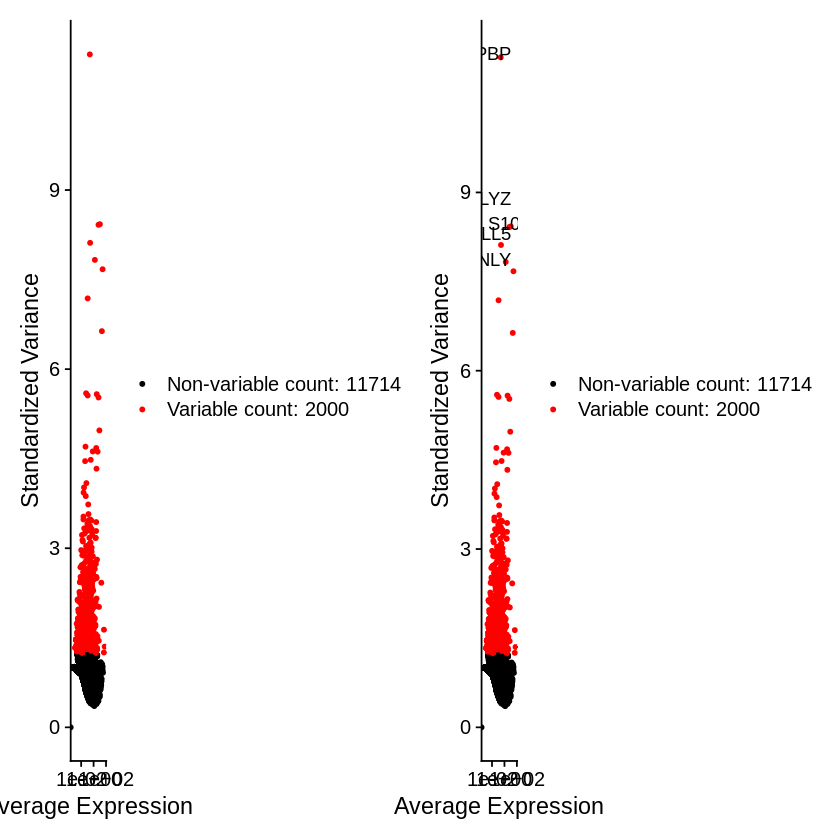

In [ ]:
# plota recursos variáveis ​​com e sem rótulos
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top5, repel = TRUE)
plot1 + plot2

### Dimplot – dimensionally reduction of principal component analysis (PCA) 🆗



A redução dimensional é importante para a análise de célula única porque ajuda a visualizar dados de alta dimensionalidade. Os dados de expressão gênica podem ter milhares de características, o que pode ser difícil de visualizar e interpretar. A PCA é uma técnica que reduz a dimensionalidade dos dados preservando as informações mais importantes. Isso pode ser feito encontrando as componentes principais, que são combinações lineares das características originais.



In [ ]:
all.genes <- rownames(pbmc)

# Muda a expressão de cada gene, de modo que a expressão média entre as células seja 0
# Dimensiona a expressão de cada gene, de modo que a variação entre as células seja 1
pbmc <- ScaleData(pbmc, features = all.genes)

Centering and scaling data matrix



PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL, FTH1, LYZ, FCN1, S100A9, TYMP 
	   FCER1G, CFD, LGALS1, S100A8, CTSS, LGALS2, SERPINA1, IFITM3, SPI1, CFP 
	   PSAP, IFI30, SAT1, COTL1, S100A11, NPC2, GRN, LGALS3, GSTP1, PYCARD 
Negative:  MALAT1, LTB, IL32, IL7R, CD2, B2M, ACAP1, CD27, STK17A, CTSW 
	   CD247, GIMAP5, AQP3, CCL5, SELL, TRAF3IP3, GZMA, MAL, CST7, ITM2A 
	   MYC, GIMAP7, HOPX, BEX2, LDLRAP1, GZMK, ETS1, ZAP70, TNFAIP8, RIC3 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1, HLA-DRA, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DMA, HLA-DPB1, HLA-DQA2, CD37, HLA-DRB5, HLA-DMB, HLA-DPA1, FCRLA, HVCN1, LTB 
	   BLNK, P2RX5, IGLL5, IRF8, SWAP70, ARHGAP24, FCGR2B, SMIM14, PPP1R14A, C16orf74 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA, FGFBP2, CTSW, GNLY, B2M, SPON2 
	   CCL4, GZMH, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX 
	   TTC38, APMAP, CTSC, S100A4, IGFBP7, ANXA1, ID2, IL32, XCL1, RHOC 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-DPB1, HLA-DPA

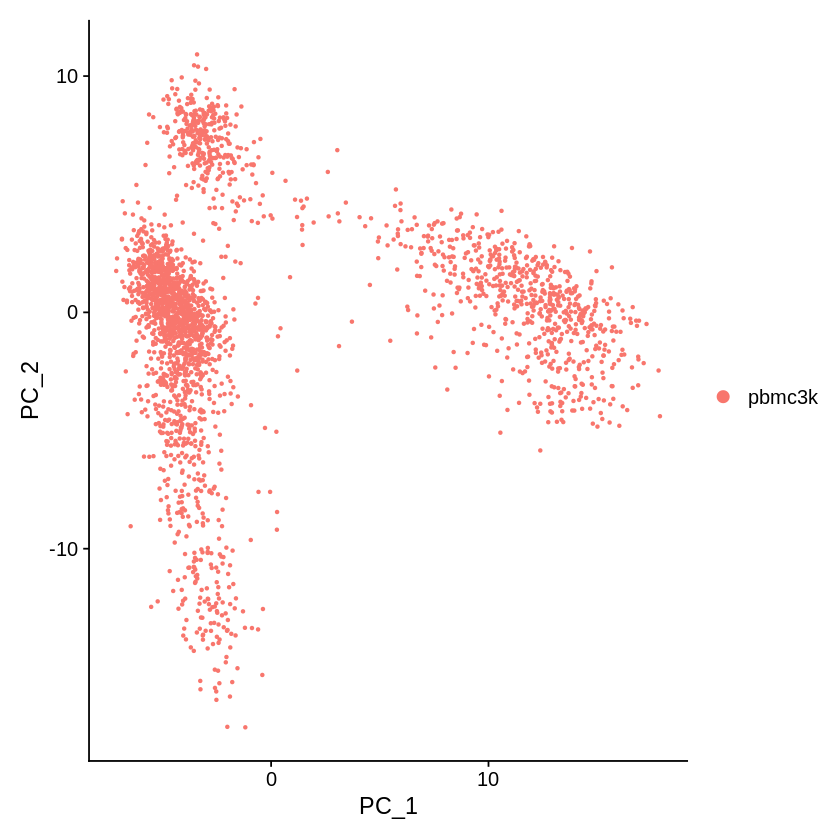

In [ ]:
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

DimPlot(pbmc, reduction = "pca")

### Dimheatmap 🆗

Os dimheatmaps são úteis para visualizar os padrões de expressão gênica em diferentes populações celulares. Eles mostram os níveis de expressão de genes em um espaço dimensional reduzido. Isso pode ajudar a identificar genes que estão diferencialmente expressos em diferentes populações celulares.

Em particular DimHeatmap(), permite a fácil exploração das fontes primárias de heterogeneidade num conjunto de dados e pode ser útil ao tentar decidir quais PCs incluir para análises posteriores posteriores. Tanto as células quanto os recursos são ordenados de acordo com suas pontuações de PCA. Definir cellsum número representa graficamente as células 'extremos' em ambas as extremidades do espectro, o que acelera drasticamente a plotagem para grandes conjuntos de dados.

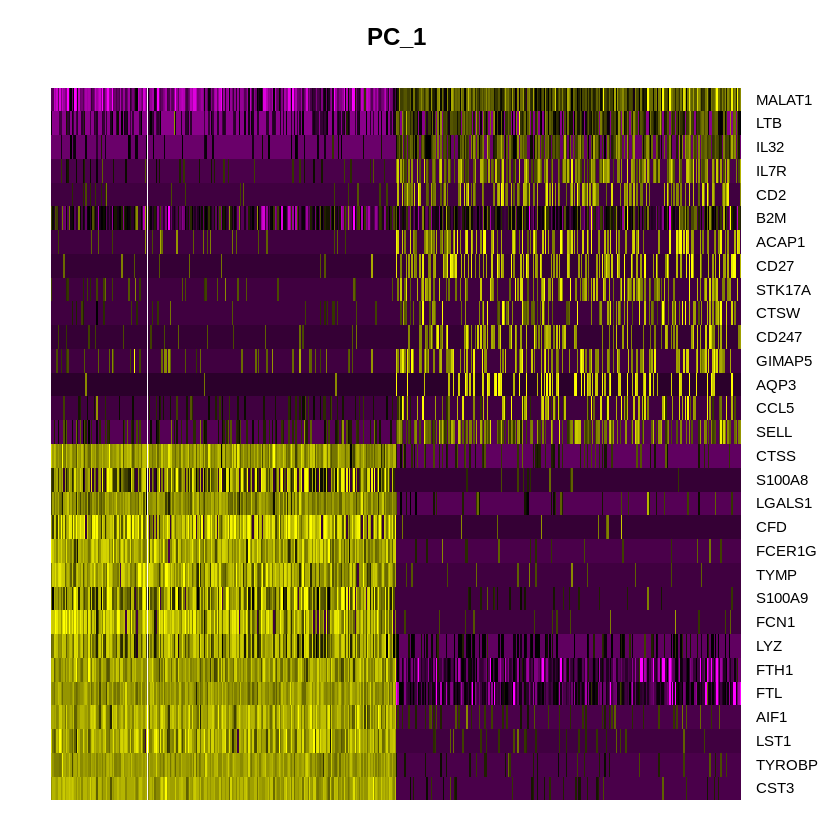

In [ ]:
DimHeatmap(pbmc, dims = 1, cells = 500, balanced = TRUE)

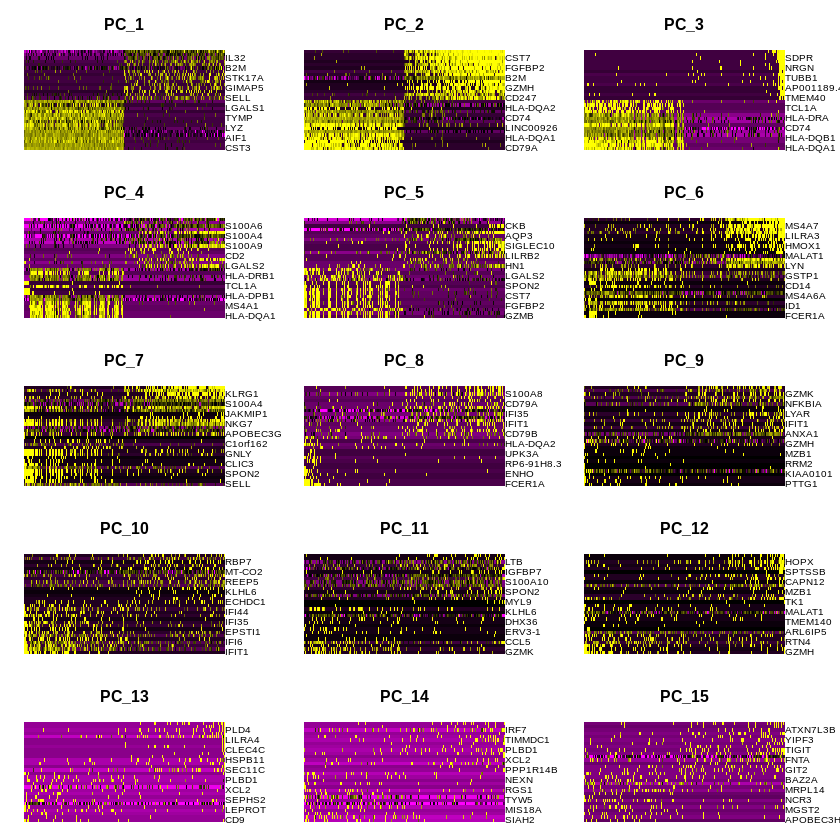

In [ ]:
DimHeatmap(pbmc, dims = 1:15, cells = 500, balanced = TRUE)

### ‘Dimensionality’ of the dataset and generate jackstraw plot 🆗

O gráfico jackstraw é usado para estimar o número de componentes independentes em um conjunto de dados. Isso é importante para a PCA, pois o número de componentes principais a serem usados depende do número de componentes independentes. O gráfico jackstraw é um método que calcula a variância explicada por cada componente principal. A variância explicada é a proporção da variação total nos dados que é explicada por cada componente principal.

Para superar o extenso ruído técnico em qualquer recurso único para dados scRNA-seq, Seurat agrupa células com base em suas pontuações de PCA, com cada PC representando essencialmente um 'meta-recurso' que combina informações em um conjunto de recursos correlacionados. Os principais componentes principais representam, portanto, uma compressão robusta do conjunto de dados. No entanto, quantos componentes devemos optar por incluir? 10? 20? 100?

Warning message:
“Removed 23516 rows containing missing values (`geom_point()`).”


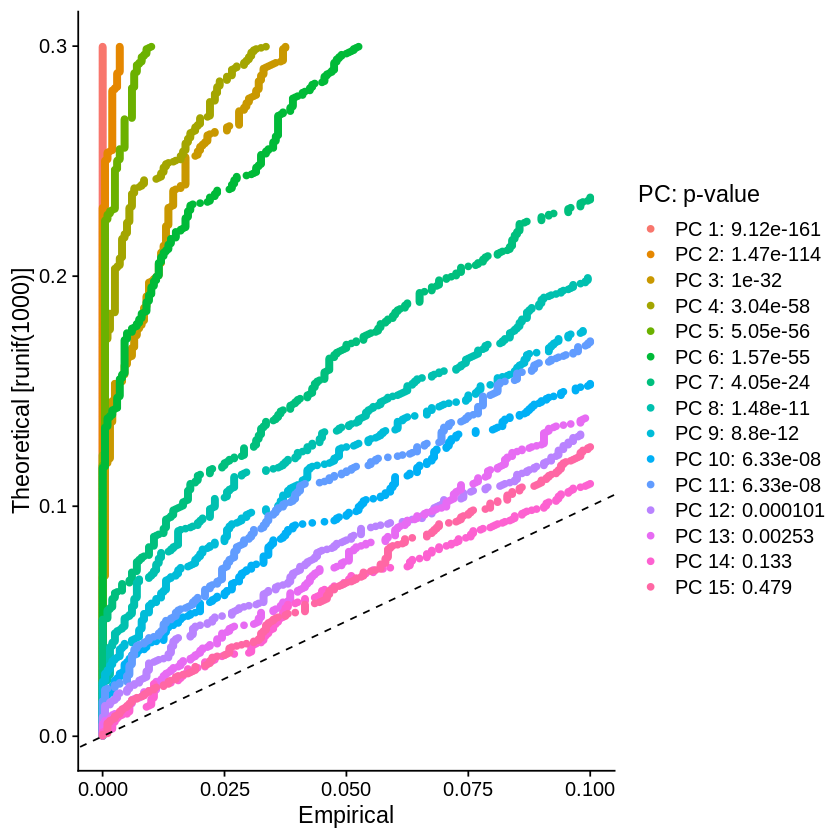

In [ ]:
pbmc <- JackStraw(pbmc, num.replicate = 100)
pbmc <- ScoreJackStraw(pbmc, dims = 1:20)
JackStrawPlot(pbmc, dims = 1:15)

### Ebow plot to determine the number of PCAs 🆗

 O gráfico de cotovelo é usado para estimar o número de componentes principais a serem usados para análises posteriores. Ele é baseado na ideia de que os primeiros componentes principais captam a maior variação nos dados, enquanto os componentes principais posteriores captam menos variação. O gráfico de cotovelo mostra a variância explicada por cada componente principal. A queda do gráfico após o primeiro ou dois componentes principais indica que esses componentes principais estão captando a maior parte da variação nos dados.

Um método heurístico alternativo gera um 'gráfico de cotovelo': uma classificação dos componentes principais com base na porcentagem de variância explicada por cada um ( ElbowPlot()função). Neste exemplo, podemos observar um “cotovelo” em torno do PC9-10, sugerindo que a maior parte do sinal verdadeiro é capturada nos primeiros 10 PCs.

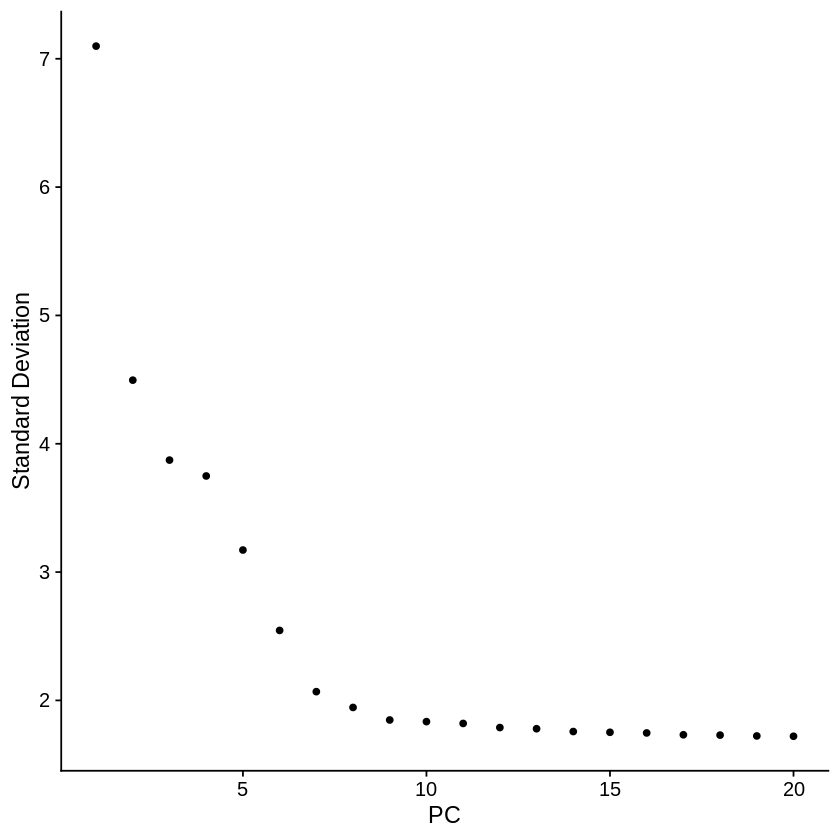

In [ ]:
ElbowPlot(pbmc)

Identificar a verdadeira dimensionalidade de um conjunto de dados – pode ser desafiador/incerto para o usuário. Portanto, sugerimos que essas três abordagens sejam consideradas. A primeira é mais supervisionada, explorando PCs para determinar fontes relevantes de heterogeneidade, e poderia ser usada em conjunto com a GSEA, por exemplo. O segundo implementa um teste estatístico baseado em um modelo nulo aleatório, mas é demorado para grandes conjuntos de dados e pode não retornar um corte de PC claro. A terceira é uma heurística comumente usada e que pode ser calculada instantaneamente. Neste exemplo, todas as três abordagens produziram resultados semelhantes, mas poderíamos ter justificado escolher qualquer coisa entre PC 7-12 como ponto de corte.

### UMAP graph with the cell clusters 🆗


O UMAP é um algoritmo de aprendizado de máquina que pode ser usado para agrupar células com base nos seus padrões de expressão. Os gráficos UMAP são úteis para visualizar os clusters de células. Eles mostram as células no espaço dimensional reduzido, de modo que células semelhantes estejam próximas umas das outras.

Para agrupar as células, em seguida aplicamos técnicas de otimização de modularidade, como o algoritmo de Louvain (padrão) ou SLM [SLM, Blondel et al ., Journal of Statistical Mechanics] , para agrupar iterativamente as células, com o objetivo de otimizar a função de modularidade padrão . A FindClusters()função implementa este procedimento e contém um parâmetro de resolução que define a 'granularidade' do cluster downstream, com valores aumentados levando a um maior número de clusters. Descobrimos que definir esse parâmetro entre 0,4-1,2 normalmente retorna bons resultados para conjuntos de dados de célula única com cerca de 3 mil células. A resolução ideal geralmente aumenta para conjuntos de dados maiores. Os clusters podem ser encontrados usando a Idents()função.

In [ ]:
pbmc <- FindNeighbors(pbmc, dims = 1:10)
pbmc <- FindClusters(pbmc, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2638
Number of edges: 95965

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8723
Number of communities: 9
Elapsed time: 0 seconds


Seurat oferece diversas técnicas de redução dimensional não linear, como tSNE e UMAP, para visualizar e explorar esses conjuntos de dados. O objetivo desses algoritmos é aprender a variedade subjacente dos dados para colocar células semelhantes juntas em um espaço de baixa dimensão. As células dentro dos clusters baseados em gráficos determinados acima devem co-localizar nesses gráficos de redução de dimensão. Como entrada para UMAP e tSNE, sugerimos usar os mesmos PCs como entrada para a análise de agrupamento.

In [ ]:
# If you haven't installed UMAP, you can do so via reticulate::py_install(packages =
# 'umap-learn')
pbmc <- RunUMAP(pbmc, dims = 1:10)
# note that you can set `label = TRUE` or use the LabelClusters function to help label
# individual clusters
DimPlot(pbmc, reduction = "umap")

### Violin plots for at leats three gene markers 🆗

Seurat pode ajudá-lo a encontrar marcadores que definem clusters por meio de expressão diferencial. Por padrão, ele identifica marcadores positivos e negativos de um único cluster (especificado em ident.1), em comparação com todas as outras células. FindAllMarkers()automatiza esse processo para todos os clusters, mas você também pode testar grupos de clusters entre si ou em todas as células.

Os gráficos de violino são úteis para comparar os níveis de expressão de genes em diferentes populações celulares. Eles mostram a distribuição de dados de expressão gênica, incluindo a média, a mediana, os quartis e os outliers. Os gráficos de violino podem ser usados para identificar genes diferencialmente expressos em diferentes populações celulares.

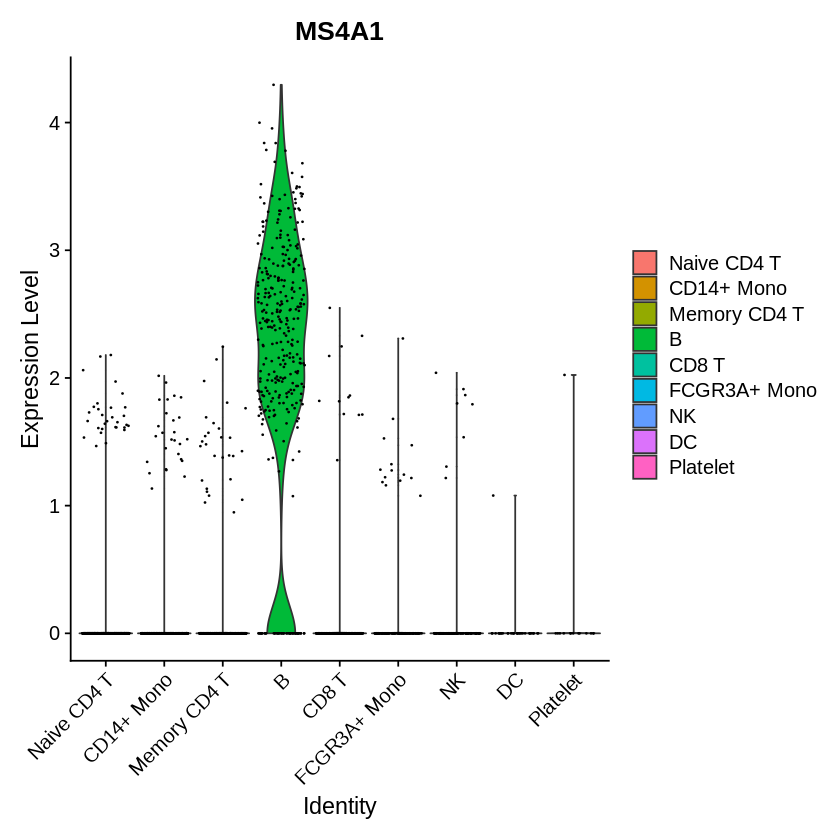

In [ ]:
VlnPlot(pbmc, features = c("MS4A1"))

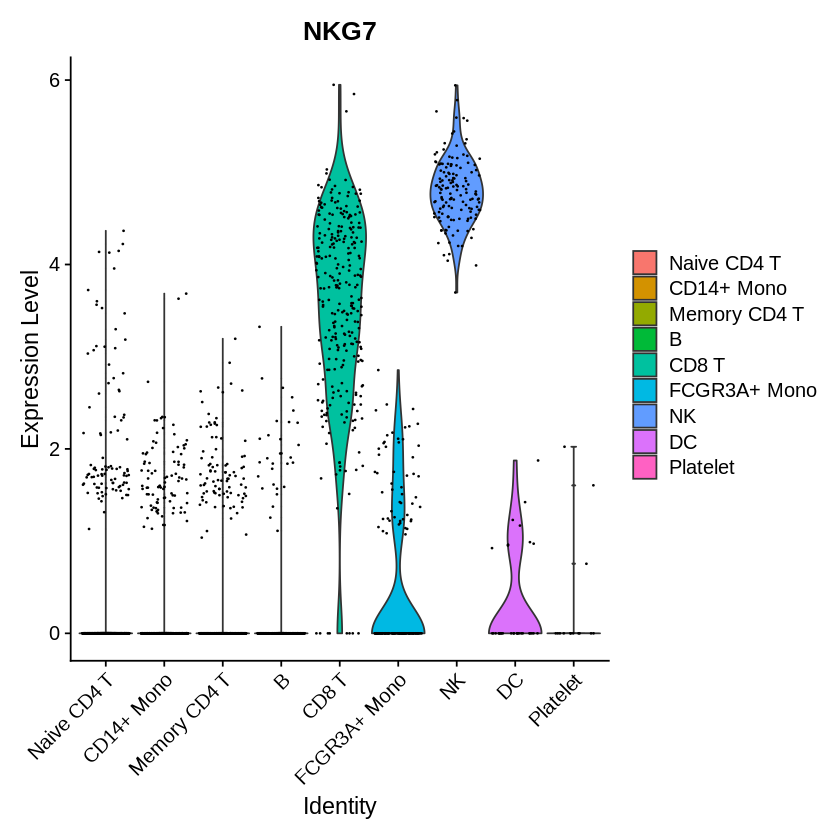

In [ ]:
VlnPlot(pbmc, features = c("NKG7"))

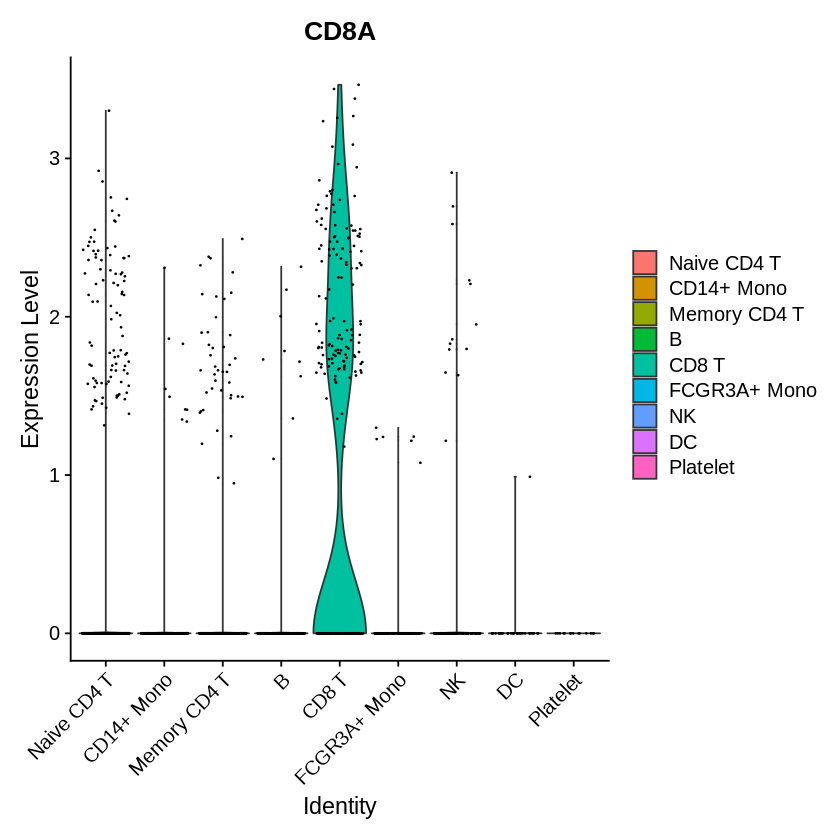

In [ ]:
VlnPlot(pbmc, features = c("CD8A"))

*Felizmente*, no caso deste conjunto de dados, podemos usar marcadores canônicos para combinar facilmente o agrupamento imparcial com tipos de células conhecidos:

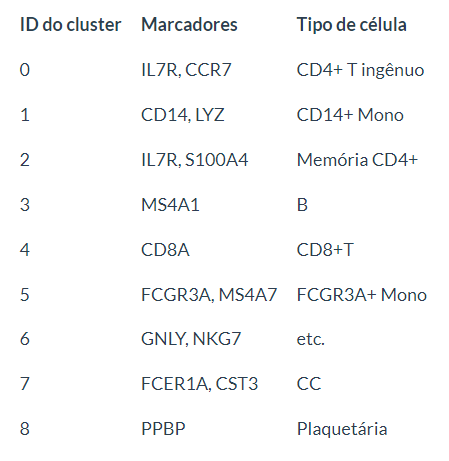

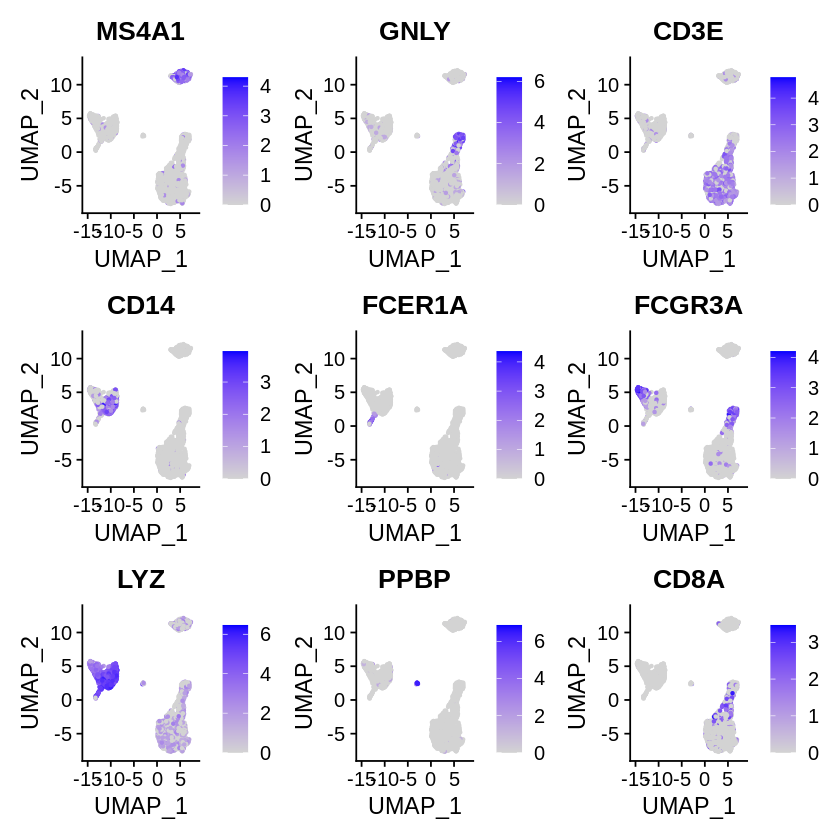

In [ ]:
FeaturePlot(pbmc, features = c("MS4A1", "GNLY", "CD3E", "CD14", "FCER1A", "FCGR3A", "LYZ", "PPBP",
    "CD8A"))

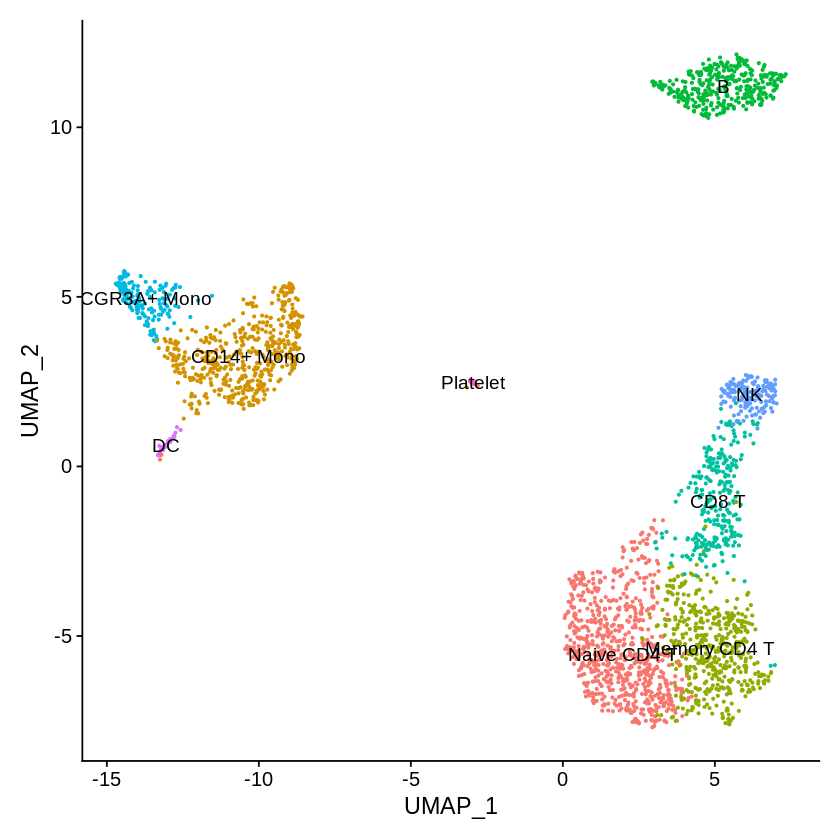

In [ ]:
new.cluster.ids <- c("Naive CD4 T", "CD14+ Mono", "Memory CD4 T", "B", "CD8 T", "FCGR3A+ Mono",
    "NK", "DC", "Platelet")
names(new.cluster.ids) <- levels(pbmc)
pbmc <- RenameIdents(pbmc, new.cluster.ids)
DimPlot(pbmc, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()